In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#reading in csv
df = pd.read_csv('./data/final_df.csv')

df.drop(columns=['Unnamed: 0'], inplace = True)

In [3]:
df.head()

,district,uncontested,116first,116last,116gender,116party,2018votes,2018pct,2018margin,congress,115last,115party,115trump_votes_y,115agree_pct,elasticity,pvi_538
0,AL-01,False,Bradley,Byrne,1,R,152308,63.3,26.6,115,Byrne,R,96,0.958333,0.90,28.61
1,AL-02,False,Martha,Roby,0,R,138582,61.5,23.0,115,Roby,R,95,0.957895,0.97,30.97
2,AL-03,False,Mike,Rogers,1,R,147481,63.8,27.6,115,Rogers,R,96,0.958333,0.79,31.37
3,AL-04,False,Robert,Aderholt,1,R,183968,79.9,59.8,115,Aderholt,R,95,0.968421,0.86,59.81
4,AL-05,False,Mo,Brooks,1,R,158373,61.1,22.2,115,Brooks,R,92,0.836957,1.00,32.81


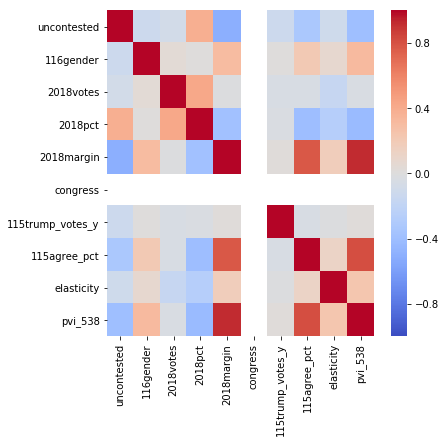

In [4]:
#heatmap to see correlations
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm')

In [5]:
#setting X and y
X = df[['115agree_pct','elasticity','pvi_538','116gender']]
y = df['2018margin']

In [6]:
#train test splitting data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

In [7]:
#scaling the data
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc  = ss.transform(X_test)

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## Modeling Linear Regression

In [8]:
#instantiating model
lr = LinearRegression()

#fitting model
lr.fit(X_train_sc, y_train)

#scoring model
print('Train Score: ',lr.score(X_train_sc,y_train))
print('Test Score: ',lr.score(X_test_sc, y_test))

Train Score:  0.8554755313038775
Test Score:  0.8438936206372465


## Modeling Random Forest

In [9]:
#instantiating model
rf = RandomForestRegressor(n_estimators = 100,
                           max_depth    = 3,
                           max_features = 3)

#fitting model
rf.fit(X_train_sc, y_train)

#scoring model
print('Train Score: ',rf.score(X_train_sc,y_train))
print('Test Score: ',rf.score(X_test_sc, y_test))

Train Score:  0.8721818606639731
Test Score:  0.852018040811368


In [10]:
#most important features
list(zip(X.columns, rf.feature_importances_))

[('115agree_pct', 0.16740983256017697),
 ('elasticity', 0.006665346399093522),
 ('pvi_538', 0.8224115905774826),
 ('116gender', 0.0035132304632471585)]

## Making Prediction Columns

In [11]:
#these are the slider 
slider_range = [i for i in range(-20, 21, 5)]

In [12]:
#creating new agree percentages
for i in slider_range:
    df[f'trumpagree_{i}'] = (df['115agree_pct'] + (df['115agree_pct'] * i/100)).clip(0,100)

In [13]:
#creating prediction columns
for i in slider_range:
    df[f'ypreds_{i}'] = rf.predict(df[[f'trumpagree_{i}','elasticity','pvi_538','116gender']])

In [14]:
#checking dataframe
df.head()

,district,uncontested,116first,116last,116gender,116party,2018votes,2018pct,2018margin,congress,...,trumpagree_20,ypreds_-20,ypreds_-15,ypreds_-10,ypreds_-5,ypreds_0,ypreds_5,ypreds_10,ypreds_15,ypreds_20
0,AL-01,False,Bradley,Byrne,1,R,152308,63.3,26.6,115,...,1.150000,41.352145,41.352145,41.352145,41.352145,41.352145,41.680992,43.249219,43.249219,43.249219
1,AL-02,False,Martha,Roby,0,R,138582,61.5,23.0,115,...,1.149474,41.352145,41.352145,41.352145,41.352145,41.352145,41.680992,43.249219,43.249219,43.249219
2,AL-03,False,Mike,Rogers,1,R,147481,63.8,27.6,115,...,1.150000,41.671666,41.671666,41.671666,41.671666,41.671666,42.000513,43.568740,43.568740,43.568740
3,AL-04,False,Robert,Aderholt,1,R,183968,79.9,59.8,115,...,1.162105,41.352145,41.352145,41.352145,41.352145,41.680992,41.680992,43.249219,43.249219,43.249219
4,AL-05,False,Mo,Brooks,1,R,158373,61.1,22.2,115,...,1.004348,41.352145,41.352145,41.352145,41.352145,41.352145,41.352145,41.352145,41.352145,41.680992


In [15]:
#exporting to final_df
df.to_csv('./data/final_df.csv')

## Analysing Predictions

In [19]:
#median of predictions
print('Real Margin median:'          ,  df['2018margin'].median())
print('-10% Agreement Margin median:',  df['ypreds_-10'].median())
print('-20% Agreement Margin median:',  df['ypreds_-20'].median())
print('10% Agreement Margin median:' ,  df['ypreds_10'].median())
print('20% Agreement Margin median: ',  df['ypreds_20'].median())

Real Margin median: -3.200000000000003
-10% Agreement Margin median: 41.35214492668995
-20% Agreement Margin median: 41.35214492668995
10% Agreement Margin median: 41.35214492668995
20% Agreement Margin median:  41.35214492668995


In [20]:
#mean of predictions
print('Real Margin median:'          ,  df['2018margin'].mean())
print('-10% Agreement Margin median:',  df['ypreds_-10'].mean())
print('-20% Agreement Margin median:',  df['ypreds_-20'].mean())
print('10% Agreement Margin median:' ,  df['ypreds_10'].mean())
print('20% Agreement Margin median: ',  df['ypreds_20'].mean())

Real Margin median: -10.310067114093961
-10% Agreement Margin median: -8.214893208933747
-20% Agreement Margin median: -8.218420299381343
10% Agreement Margin median: -7.42764364668879
20% Agreement Margin median:  -7.127907857047657
